In [109]:
import math
import numpy as np
from random import choice
from matplotlib import pyplot as plt

### Montgomery Form

In [110]:
def MForm(a,n):
    """
    
    Parameters
    ----------
    a : int
        A positive integer.
    n : int
        A positive integer.

    Returns
    -------
    int. The function returns the Montgomery form of a modulo n.

    """
    
    exp = math.ceil(math.log(n, 2))
    R = pow(2, exp)
    return (a*R)%n

In [111]:
MForm(2,11)

10

In [112]:
MForm(5,161)

153

## MMM

In [113]:
def MMM(a,b,p):
    """
    
    Parameters
    ----------
    a : int
        A positive integer.
    b : int
        A positive integer.
    n : int
        A positive integer.

    Returns
    -------
    int. The function returns the Montgomery form of a*b modulo n.

    """
    return MForm(a*b, p)

In [114]:
MMM(2,5,7)

3

In [115]:
MMM(4,9,161)

39

In [116]:
MMM(9,7,15)

3

## MMM reduction

In [117]:
def inv(a, n):
    """
    
    Parameters
    ----------
    a : int
        A positive integer.
    n : int
        A positive integer.

    Returns
    -------
    int or None. The function returns the inverse of a modulo n, or None if it doesn't have one.

    """
    for i in range(1, n):
        if (a*i)%n == 1:
            return i

In [118]:
def find_v(n):
    """
    
    Parameters
    ----------
    n : int
        A positive integer.

    Returns
    -------
    tuple. The function returns (R, v), where RR^{-1}-vp = 1.

    """
    
    exp = math.ceil(math.log(n, 2))
    R = pow(2, exp)
    Rinv = inv(R, n)
    v = (R*Rinv-1)//n
    return (R, v)

In [119]:
def MMMr(a, b, n):
    """
    
    Parameters
    ----------
    a : int
        A positive integer.
    b : int
        A positive integer.
    n : int
        A positive integer.

    Returns
    -------
    int. The function returns the MMM of a and b modulo n.

    """
    
    flag = 0
    D = MForm(a, n)*MForm(b, n)
    R, v = find_v(n)
    m = ((D%R)*v)%R
    U = (D+(m*n))//R # 0 <= U <= 2n
    if U >= n:
        U = U-n
        flag = 1
    return (U, flag)

In [120]:
MMMr(2,5,7)

(3, 0)

In [121]:
MMMr(4,9,161)

(39, 0)

In [122]:
MMMr(9,7,15)

(3, 1)

##  Left-to-right Montgomery ladder with MMM algorithm

In [123]:
def LtRMontLadder(m, kb, n):
    """
    
    Parameters
    ----------
    m : int
        A positive integer.
    kb : str
        A string that represents an integer in 2-base.
    n : int
        A positive integer.

    Returns
    -------
    int. The function returns m^k mod n.

    """
    
    exp = math.ceil(math.log(n, 2))
    R = pow(2, exp)
    Rinv = inv(R, n)
    R0 = MMMr(m, Rinv**2, n)[0]
    R1 = MMMr(R0, R0, n)[0]
    for i in range(3,len(kb)):
        if kb[i] == '0':
            R1 = MMMr(R0, R1, n)[0]
            R0 = MMMr(R0,R0,n)[0]
            w.append(MMMr(R0, R1, n)[1])
            w.append(MMMr(R0,R0,n)[1])
        else:
            R0 = MMMr(R0, R1, n)[0]
            R1 = MMMr(R1,R1,n)[0]
            w.append(MMMr(R0, R1, n)[1])
            w.append(MMMr(R1, R1, n)[1])
    return (R0*R)%n

In [124]:
w = []
p = 143
k = 23
kb = bin(k)
print(kb[2:])
m = 3
print(LtRMontLadder(m, kb, p))
print(w)

10111
126
[0, 0, 1, 0, 0, 0, 1, 0]


In [125]:
(m**k)%p

126

In [126]:
w = []
p = 4277
k = 11
kb = bin(k)
m = 12
LtRMontLadder(m, kb, p)

1130

In [127]:
(m**k)%p

1130

## Attack

In [128]:
def convert(L):
    """
    
    Parameters
    ----------
    L : list
        A list of 1's and 0's.

    Returns
    -------
    int. The function returns the 10-base representation of L.

    """
    
    r = 0
    for i in range(len(L)-1,-1,-1):
        if L[i] == 1:
            r += pow(2,len(L)-i-1)
    return r

In [129]:
convert([1,0,1,1,0,1,1])

91

In [130]:
def uM(ER):
    """
    
    Parameters
    ----------
    ER : list
        An Extra-Reduction list of 0's and 1's.

    Returns
    -------
    float. The function returns the estimation of uM.

    """
    
    N = len(ER)
    l = len(ER[0])
    l0 = l//2
    pR_E = 0
    for i in range(N):
        for j in range(0, l, 2):
            pR_E += ER[i][j]
    return pR_E/(N*l0)

def uQ(ER):
    """
    
    Parameters
    ----------
    ER : list
        An Extra-Reduction list of 0's and 1's.

    Returns
    -------
    float. The function returns the estimation of uQ.

    """
    
    N = len(ER)
    l = len(ER[0])
    l0 = l//2
    pn_E = 0
    for i in range(N):
        for j in range(1, l, 2):
            pn_E += ER[i][j]
    return pn_E/(N*l0)

In [131]:
x = list(range(100))
y = []
y1 = []
N = []
s = (0,1)
for j in x:
    for i in range(100):
        N.append([choice(s),choice(s),choice(s),choice(s)])
    y.append(uM(N))
    y1.append(uQ(N))
mean = sum(y)/100
mean1 = sum(y1)/100

N

[[1, 1, 1, 0],
 [1, 0, 0, 1],
 [0, 1, 0, 1],
 [1, 1, 0, 1],
 [1, 0, 1, 1],
 [0, 1, 1, 0],
 [1, 1, 1, 1],
 [0, 1, 0, 0],
 [1, 0, 1, 0],
 [1, 0, 1, 1],
 [0, 1, 0, 1],
 [1, 1, 0, 1],
 [1, 0, 1, 0],
 [1, 1, 0, 1],
 [0, 1, 0, 0],
 [1, 1, 0, 1],
 [0, 1, 0, 0],
 [0, 1, 1, 1],
 [0, 1, 0, 0],
 [0, 0, 0, 1],
 [0, 0, 1, 1],
 [1, 0, 0, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 1],
 [1, 0, 0, 0],
 [0, 1, 1, 0],
 [1, 1, 0, 1],
 [0, 0, 1, 1],
 [0, 0, 1, 0],
 [1, 0, 1, 0],
 [1, 1, 1, 0],
 [1, 1, 0, 1],
 [0, 1, 1, 1],
 [1, 0, 1, 1],
 [1, 1, 0, 0],
 [1, 1, 1, 1],
 [0, 1, 1, 1],
 [1, 0, 1, 1],
 [1, 1, 1, 1],
 [0, 0, 1, 0],
 [1, 1, 1, 0],
 [1, 0, 1, 0],
 [1, 0, 0, 0],
 [0, 1, 1, 1],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 0, 0],
 [1, 1, 0, 1],
 [0, 0, 0, 0],
 [1, 1, 0, 0],
 [0, 0, 0, 1],
 [0, 0, 1, 1],
 [1, 1, 1, 1],
 [1, 0, 1, 1],
 [1, 1, 0, 1],
 [1, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 1, 0, 1],
 [0, 1, 0, 1],
 [0, 1, 1, 1],
 [1, 1, 0, 0],
 [1, 1, 0, 0],
 [0, 1, 1, 1],
 [1, 1, 1, 0],
 [0, 1, 1, 1],
 [0, 0, 1, 1],
 [1, 0, 0,

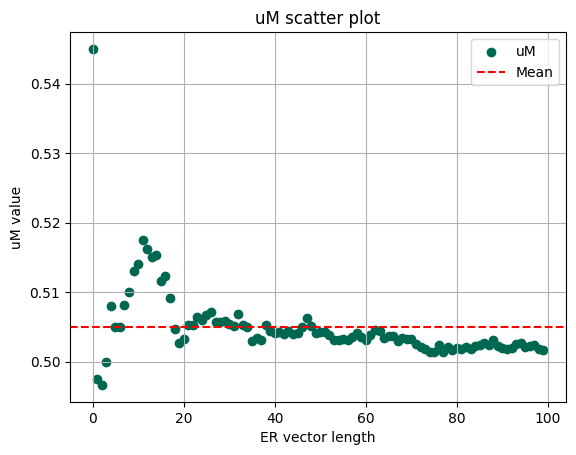

In [132]:
plt.scatter(x, y, color='#006750', label='uM')
plt.axhline(y = mean, color='red', linestyle='--', label='Mean')
plt.title('uM scatter plot')
plt.xlabel('ER vector length')
plt.ylabel('uM value')
plt.grid(True)
plt.legend()

plt.show()

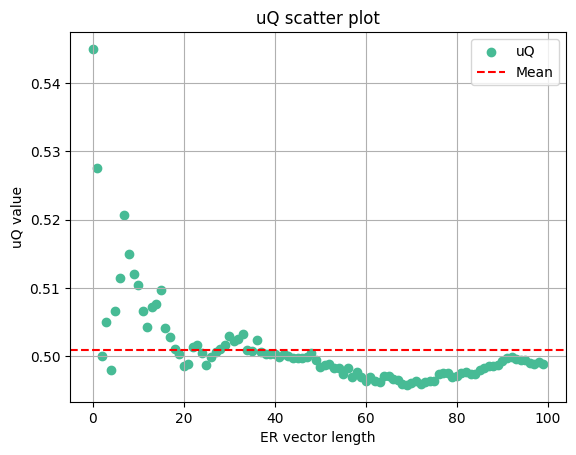

In [133]:
plt.scatter(x, y1, color='#47BB95', label='uQ')
plt.axhline(y = mean1, color='red', linestyle='--', label='Mean')
plt.title('uQ scatter plot')
plt.xlabel('ER vector length')
plt.ylabel('uQ value')
plt.grid(True)
plt.legend()

plt.show()

In [134]:
def p_Estimators(ER):
    """
    
    Parameters
    ----------
    ER : list
        An Extra-Reduction list of 0's and 1's.

    Returns
    -------
    tuple. The function returns the estimations of p/R and p_noise.

    """
    
    um = uM(ER)
    uq = uQ(ER)
    pR_e = (12*(uq-um))/(1+(6*uq)-(8*um))
    pn_e = (4*um)-(3*uq)
    return (pR_e/2,pn_e)

In [154]:
x = list(range(100))
ypR = []
ypn = []
N = []
s = (0,1)
for j in x:
    for i in range(10):
        N.append([choice(s),choice(s),choice(s),choice(s)])
    ypR.append(p_Estimators(N)[0])
    ypn.append(p_Estimators(N)[1])
    #print(p_Estimators(N))

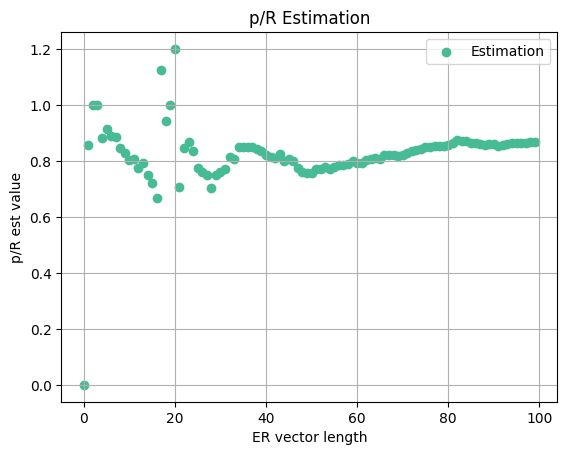

In [155]:
plt.scatter(x, ypR, color='#47BB95', label='Estimation')
#plt.axhline(y = mean1, color='red', linestyle='--', label='Mean')
plt.title('p/R Estimation')
plt.xlabel('ER vector length')
plt.ylabel('p/R est value')
plt.grid(True)
plt.legend()

plt.show()

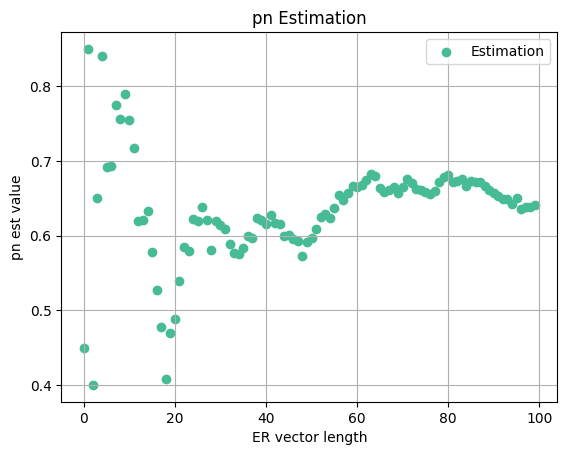

In [156]:
plt.scatter(x, ypn, color='#47BB95', label='Estimation')
#plt.axhline(y = mean1, color='red', linestyle='--', label='Mean')
plt.title('pn Estimation')
plt.xlabel('ER vector length')
plt.ylabel('pn est value')
plt.grid(True)
plt.legend()

plt.show()

In [138]:
def vErrors(u):
    """
    
    Parameters
    ----------
    u : int
        An integer >= 2.

    Returns
    -------
    list. The function returns all possible 0's and 1's u-combinations.

    """
    
    r = []
    for i in range(pow(2,2*u)):
        bf = list(bin(i)[2:])
        temp = [0]*((2*u)-len(bf))+[eval(i) for i in bf]
        if temp not in r:
            r.append(temp)
    return r
vErrors(2)

[[0, 0, 0, 0],
 [0, 0, 0, 1],
 [0, 0, 1, 0],
 [0, 0, 1, 1],
 [0, 1, 0, 0],
 [0, 1, 0, 1],
 [0, 1, 1, 0],
 [0, 1, 1, 1],
 [1, 0, 0, 0],
 [1, 0, 0, 1],
 [1, 0, 1, 0],
 [1, 0, 1, 1],
 [1, 1, 0, 0],
 [1, 1, 0, 1],
 [1, 1, 1, 0],
 [1, 1, 1, 1]]

In [139]:
def ham(V):
    """
    
    Parameters
    ----------
    V : list
        A list of 0's and 1's.

    Returns
    -------
    int. The function returns the number of 1's in V.

    """
    
    c = 0
    for i in V:
        if i == 1:
            c += 1
    return c

In [140]:
def prob_u2(vt, ER, pR):
    """
    
    Parameters
    ----------
    vt : list
        A two elements list in {0,1}^2.
    ER : list
        An Extra-Reduction list of 0's and 1's.
    pR : float
        The estimation of p/r.

    Returns
    -------
    float. Probability function that depends on ER and vt.

    """
    
    prob = 0
    if vt == [0, 0] or vt == [1,1]:
        if ER == [0,0,0,0]:
            return 1+(1/264)*(pR**8)-(1/72)*(pR**6)-(11/336)*(pR**5)+(17/504)*(pR**4)+(7/90)*(pR**3)+(1/3)*(pR**2)-(7/6)*(pR)
        elif ER == [0,0,0,1]:
            return -(1/264)*(pR**8)+(1/72)*(pR**6)+(1/84)*(pR**5)+(1/72)*(pR**4)-(7/90)*(pR**3)+(1/8)*(pR**2)+(1/4)*pR
        elif ER == [0,0,1,0]:
            return -(1/264)*(pR**8)+(1/72)*(pR**6)+(1/48)*(pR**5)-(17/504)*(pR**4)-(5/24)*(pR**2)+(1/3)*pR
        elif ER == [0,0,1,1]:
            return (1/264)*(pR**8)-(1/72)*(pR**6)-(1/72)*(pR**4)+(1/8)*(pR**2)
        elif ER == [0,1,0,0]:
            return -(1/264)*(pR**8)+(11/336)*(pR**5)+(1/72)*(pR**4)-(1/36)*(pR**3)-(5/24)*(pR**2)+(1/4)*(pR)
        elif ER == [0,1,0,1]:
            return (1/264)*(pR**8)-(1/84)*(pR**5)-(1/72)*(pR**4)+(1/36)*(pR**3)
        elif ER == [0,1,1,0]:
            return (1/264)*(pR**8)-(1/48)*(pR**5)-(1/72)*(pR**4)+(1/12)*(pR**2)
        elif ER == [0,1,1,1]:
            return -(1/264)*(pR**8)+(1/72)*(pR**4)
        elif ER == [1,0,0,0]:
            return (1/7)*((1/12)*(pR**5)-(1/3)*(pR**4))-(1/264)*(pR**8)+(1/72)*(pR**6)+(1/48)*(pR**5)-(1/20)*(pR**3)-(1/8)*(pR**2)+(1/3)*pR
        elif ER == [1,0,0,1]:
            return (1/264)*(pR**8)-(1/72)*(pR**6)-(1/84)*(pR**5)+(1/20)*(pR**3)
        elif ER == [1,0,1,0]:
            return (1/264)*(pR**8)-(1/72)*(pR**6)-(1/48)*(pR**5)+(1/21)*(pR**4)
        elif ER == [1,0,1,1]:
            return -(1/360)*(pR**8)+(1/72)*(pR**5)
        elif ER == [1,1,0,0]:
            return (1/264)*(pR**8)-(11/336)*(pR**5)+(1/8)*(pR**2)
        elif ER == [1,1,0,1]:
            return -(1/360)*(pR**8)+(1/72)*(pR**5)
        elif ER == [1,1,1,0]:
            return -(1/264)*(pR**8)+(1/84)*(pR**5)
        else:
            return (1/264)*(pR**8)
    elif vt == [0,1] or vt == [1,0]:
        if ER == [0,0,0,0]:
            return 1+(1/360)*(pR**8)-(1/200)*(pR**6)-(13/504)*(pR**5)+(1/240)*(pR**4)+(7/90)*(pR**3)+(13/36)*(pR**2)-(7/6)*(pR)
        elif ER == [0,0,0,1]:
            return -(1/360)*(pR**8)+(1/200)*(pR**6)+(1/72)*(pR**5)+(1/240)*(pR**4)-(17/72)*(pR**2)+(1/3)*pR
        elif ER == [0,0,1,0]:
            return -(1/360)*(pR**8)+(1/200)*(pR**6)+(1/84)*(pR**5)+(1/40)*(pR**4)-(7/90)*(pR**3)-(1/8)*(pR**2)+(1/4)*pR
        elif ER == [0,0,1,1]:
            return (1/360)*(pR**8)-(1/200)*(pR**6)-(1/40)*(pR**4)+(1/8)*(pR**2)
        elif ER == [0,1,0,0]:
            return -(1/360)*(pR**8)+(1/200)*(pR**6)+(13/504)*(pR**5)-(1/48)*(pR**4)-(1/36)*(pR**3)-(1/8)*(pR**2)+(1/4)*(pR)
        elif ER == [0,1,0,1]:
            return (1/360)*(pR**8)-(1/200)*(pR**6)-(1/72)*(pR**5)+(1/48)*(pR**4)
        elif ER == [0,1,1,0]:
            return (1/360)*(pR**8)-(1/200)*(pR**6)-(1/84)*(pR**5)+(1/36)*(pR**3)
        elif ER == [0,1,1,1]:
            return -(1/360)*(pR**8)+(1/200)*(pR**6)
        elif ER == [1,0,0,0]:
            return -(1/360)*(pR**8)+(13/504)*(pR**5)+(1/40)*(pR**4)-(1/20)*(pR**3)-(17/72)*(pR**2)+(1/3)*pR
        elif ER == [1,0,0,1]:
            return (1/360)*(pR**8)-(1/72)*(pR**5)-(1/40)*(pR**4)+(1/9)*(pR**2)
        elif ER == [1,0,1,0]:
            return (1/360)*(pR**8)-(1/84)*(pR**5)-(1/40)*(pR**4)+(1/20)*(pR**3)
        elif ER == [1,0,1,1]:
            return -(1/360)*(pR**8)+(1/40)*(pR**4)
        elif ER == [1,1,0,0]:
            return (1/360)*(pR**8)-(13/504)*(pR**5)+(1/8)*(pR**2)
        elif ER == [1,1,0,1]:
            return -(1/360)*(pR**8)+(1/72)*(pR**5)
        elif ER == [1,1,1,0]:
            return -(1/360)*(pR**8)+(1/84)*(pR**5)
        else:
            return (1/360)*(pR**8)

In [141]:
prob_u2([1,0], w[:4], 0.9)

0.2852413943928571

In [142]:
def Lsum_mod2(L1,L2):
    """
    
    Parameters
    ----------
    L1 : list
        A list of positive integers.
    L2 : list
        A list of positive integers.

    Returns
    -------
    list. The function returns the list of modular sums of each element of L1 and L2.

    """
    
    L = []
    for i in range(len(L1)):
        L.append(L1[i]+L2[i])
    return L

In [167]:
def Attack_u2(ER):
    """
    
    Parameters
    ----------
    ER : list
        An Extra-Reduction list of 0's and 1's.

    Returns
    -------
    list. The function returns estimation of a key k.

    """
    
    # u = 2
    pR_E, pn_E = p_Estimators(ER) # p/R and p_noise Estimations
    t_est = []
    prob_l = []
    Err_v = vErrors(2) #Error vectors
    # i = u-1, 2(u-1), 3(u-1)...
    for theta in [[0,0],[1,0]]:
        prob_temp = 0
        for v in Err_v:
            for er_v in ER:
                for j in range(1,len(er_v),2):
                    prob_temp += prob_u2(theta, Lsum_mod2(v,er_v), pR_E)
            prob_temp *= pow(pn_E, ham(v))*pow(1-pn_E,4-ham(v))
        prob_l.append(prob_temp)
    for i in range(0,len(ER[0]),2):
        Accum = [0]*16
        for v_n in ER:
            Accum[convert(v_n[i:i+4])] += 1
        for theta in [[0,0],[1,0]]:
            Tt = 0
            for vec in Err_v:
                Tt += Accum[convert(vec)]*np.log(prob_u2(theta, vec, pR_E))
            t_est.append(Tt)
    k_est = [0]*(len(ER[0])//2)
    k_est[0] = 1
    #k_est[-1] = 1
    for i in range(1, len(ER[0])//2 - 2):
        for j in range(2):
            #print(i+j)
            k_est[1+i-j] = int((t_est[i+j]+k_est[i]))%2
    k_est.append(1)
    k_est.reverse()
    return (k_est, convert(k_est))

In [221]:
x = list(range(200))
y = []
N = []
s = (0,1)
for j in x:
    N.append([choice(s),choice(s),choice(s),choice(s),choice(s),choice(s),choice(s),choice(s)])
    y.append(Attack_u2(N)[1])

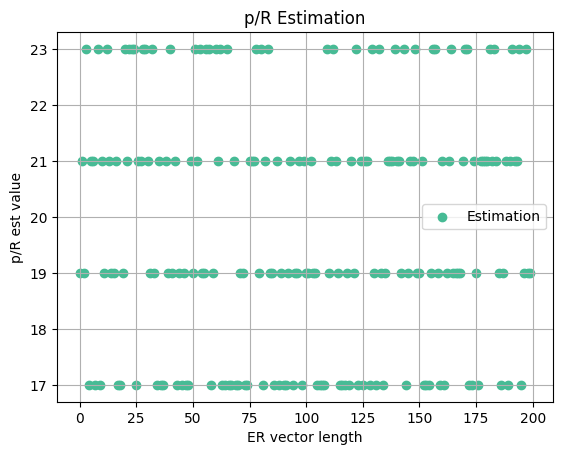

In [222]:
plt.scatter(x, y, color='#47BB95', label='Estimation')
#plt.axhline(y = mean1, color='red', linestyle='--', label='Mean')
plt.title('p/R Estimation')
plt.xlabel('ER vector length')
plt.ylabel('p/R est value')
plt.grid(True)
plt.legend()

plt.show()

# Implement attack model

In [202]:
w = []
p = 143
kb = bin(23)
print(kb[2:])
m = 3
LtRMontLadder(m, kb, p)
N = [w]
print(N)
s = (0,1)
for j in range(200):
    for i in range(10):
        N.append([choice(s),choice(s),choice(s),choice(s),choice(s),choice(s),choice(s),choice(s)])

10111
[[0, 0, 1, 0, 0, 0, 1, 0]]


In [203]:
Attack_u2(N)

([1, 0, 1, 1, 1], 23)